In [1]:
# add Flux,Metalhead,BSON packages
# add CuArrays to get GPU support
#cd("../zilla/P/N/Aesthetics/ArtInverseBrain17/SynthJulia/AIBflux")
pwd()
using Pkg
#Pkg.activate(".")  # pick up Flux v0.10.0

using Flux
#using Metalhead
Pkg.installed()["Flux"]  # v0.9.0
#using Tracker: gradient  # only for 0.9

using BSON
using BSON: @load

using Images, ImageMagick #AbstractRGB


F = Float32

Float32

In [2]:
# cp /root/.julia/packages/Metalhead/RZn9O/deps/vgg19.bson . #linux/docker
# ln -s ~/.julia/packages/Metalhead/tbYpP/deps/vgg19.bson .  #mac

# https://github.com/FluxML/Flux.jl/blob/master/docs/src/saving.md

#=
Dict{Symbol,Any} with 38 entries:
  :conv4_2_w_0 => Float32[-0.00605492 -0.00096373 0.000626743; 0.00679103 0.009…
  :conv3_3_w_0 => Float32[-0.000198241 -0.000861549 -0.00059339; 0.00153241 -0.…
  :fc6_w_0     => Float32[0.000740605 -9.02351e-5 … 0.000489794 -0.000968067; -…
  :fc8_w_0     => Float32[0.0117621 -0.00695795 … -0.00535216 0.0103952; -0.011…
  :conv4_3_b_0 => Float32[0.00169088, 0.043703, 0.0566955, 0.0205713, 0.0076408…
  :conv1_2_w_0 => Float32[0.148688 0.170782 -0.0197718; 0.181252 -0.0287904 -0.…
  :conv3_4_w_0 => Float32[-0.0145519 -0.0260602 -0.0111239; -0.00908116 -0.0275…
  :conv2_2_w_0 => Float32[-0.000591473 -0.00272857 -0.00527541; 0.00139092 0.00…
  :conv2_2_b_0 => Float32[-0.0764114, -0.110066, -0.144156, 0.0385552, 0.258943…
  :conv3_3_b_0 => Float32[0.0205515, -0.0192079, 0.0514344, 0.0547953, 0.094897…
  :conv2_1_b_0 => Float32[-0.0426487, 0.0790341, -0.0259495, 0.099568, 0.113474…
  :conv4_1_w_0 => Float32[0.0258524 0.0609968 0.0256101; -0.00310215 -0.0016468…
  :fc6_b_0     => Float32[-0.211796, 0.136735, -0.264046, -0.270283, -0.217785,…
  :fc7_b_0     => Float32[0.633823, 0.457725, 0.57202, 0.371374, 0.563893, 0.42…
  :conv1_1_w_0 => Float32[0.341195 0.232159 -0.0726092; 0.339992 0.0897821 -0.2…
  :conv4_3_w_0 => Float32[0.0224884 0.00958263 -0.00786132; 0.0394638 0.0211056…
  :conv1_2_b_0 => Float32[-0.292965, 0.339774, 0.159743, 0.0413218, 0.776448, 0…
  :conv4_2_b_0 => Float32[0.00436518, -0.0094778, -0.00375432, 0.0194299, -0.01…
  :conv4_4_w_0 => Float32[0.0126708 0.0157267 0.0163364; 0.00733232 0.0141943 0…
  ⋮            => ⋮
=#

#=
# FROM EXAMPLE CODE
function vgg19_layers()
  #ws = weights("vgg19.bson")	# is in the Metalhead package /root/.julia/packages/Metalhead/RZn9O/deps/vgg19.bson
  ls = Chain(
    Conv(ws[:conv1_1_w_0][end:-1:1,:,:,:][:,end:-1:1,:,:], ws[:conv1_1_b_0], relu, pad = (1,1), stride = (1,1), dilation = (1,1)),	# conv1_1, relu1_1
    Conv(ws[:conv1_2_w_0][end:-1:1,:,:,:][:,end:-1:1,:,:], ws[:conv1_2_b_0], relu, pad = (1,1), stride = (1,1), dilation = (1,1)),	# conv1_2, relu1_2
    MaxPool((2,2)),	# 5:pool1
    Conv(ws[:conv2_1_w_0][end:-1:1,:,:,:][:,end:-1:1,:,:], ws[:conv2_1_b_0], relu, pad = (1,1), stride = (1,1), dilation = (1,1)),
    Conv(ws[:conv2_2_w_0][end:-1:1,:,:,:][:,end:-1:1,:,:], ws[:conv2_2_b_0], relu, pad = (1,1), stride = (1,1), dilation = (1,1)),
    MaxPool((2,2)),	# 10:pool2
    Conv(ws[:conv3_1_w_0][end:-1:1,:,:,:][:,end:-1:1,:,:], ws[:conv3_1_b_0], relu, pad = (1,1), stride = (1,1), dilation = (1,1)),
    Conv(ws[:conv3_2_w_0][end:-1:1,:,:,:][:,end:-1:1,:,:], ws[:conv3_2_b_0], relu, pad = (1,1), stride = (1,1), dilation = (1,1)),
    Conv(ws[:conv3_3_w_0][end:-1:1,:,:,:][:,end:-1:1,:,:], ws[:conv3_3_b_0], relu, pad = (1,1), stride = (1,1), dilation = (1,1)),
    Conv(ws[:conv3_4_w_0][end:-1:1,:,:,:][:,end:-1:1,:,:], ws[:conv3_4_b_0], relu, pad = (1,1), stride = (1,1), dilation = (1,1)),
    MaxPool((2,2)),	# 17: pool3
    Conv(ws[:conv4_1_w_0][end:-1:1,:,:,:][:,end:-1:1,:,:], ws[:conv4_1_b_0], relu, pad = (1,1), stride = (1,1), dilation = (1,1)),
    Conv(ws[:conv4_2_w_0][end:-1:1,:,:,:][:,end:-1:1,:,:], ws[:conv4_2_b_0], relu, pad = (1,1), stride = (1,1), dilation = (1,1)),
    Conv(ws[:conv4_3_w_0][end:-1:1,:,:,:][:,end:-1:1,:,:], ws[:conv4_3_b_0], relu, pad = (1,1), stride = (1,1), dilation = (1,1)),
    Conv(ws[:conv4_4_w_0][end:-1:1,:,:,:][:,end:-1:1,:,:], ws[:conv4_4_b_0], relu, pad = (1,1), stride = (1,1), dilation = (1,1)),
    MaxPool((2,2)),
    Conv(ws[:conv5_1_w_0][end:-1:1,:,:,:][:,end:-1:1,:,:], ws[:conv5_1_b_0], relu, pad = (1,1), stride = (1,1), dilation = (1,1)),
    Conv(ws[:conv5_2_w_0][end:-1:1,:,:,:][:,end:-1:1,:,:], ws[:conv5_2_b_0], relu, pad = (1,1), stride = (1,1), dilation = (1,1)),
    Conv(ws[:conv5_3_w_0][end:-1:1,:,:,:][:,end:-1:1,:,:], ws[:conv5_3_b_0], relu, pad = (1,1), stride = (1,1), dilation = (1,1)),
    Conv(ws[:conv5_4_w_0][end:-1:1,:,:,:][:,end:-1:1,:,:], ws[:conv5_4_b_0], relu, pad = (1,1), stride = (1,1), dilation = (1,1)),
    MaxPool((2,2)),
    x -> reshape(x, :, size(x, 4)),
    Dense(ws[:fc6_w_0]', ws[:fc6_b_0], relu),
    Dropout(0.5f0),
    Dense(ws[:fc7_w_0]', ws[:fc7_b_0], relu),
    Dropout(0.5f0),
    Dense(ws[:fc8_w_0]', ws[:fc8_b_0]),
    softmax)
  return ls
end
=# #EXAMPLECODE


In [69]:
# FROM METALHEAD
function vgg19_layers(ws)
  #ws = weights("vgg19.bson")
  ls = Chain(
    Conv(ws[:conv1_1_w_0][end:-1:1,:,:,:][:,end:-1:1,:,:], ws[:conv1_1_b_0], relu, pad = (1,1), stride = (1,1), dilation = (1,1)),
    Conv(ws[:conv1_2_w_0][end:-1:1,:,:,:][:,end:-1:1,:,:], ws[:conv1_2_b_0], relu, pad = (1,1), stride = (1,1), dilation = (1,1)),
    MaxPool((2,2)),
    Conv(ws[:conv2_1_w_0][end:-1:1,:,:,:][:,end:-1:1,:,:], ws[:conv2_1_b_0], relu, pad = (1,1), stride = (1,1), dilation = (1,1)),
    Conv(ws[:conv2_2_w_0][end:-1:1,:,:,:][:,end:-1:1,:,:], ws[:conv2_2_b_0], relu, pad = (1,1), stride = (1,1), dilation = (1,1)),
    MaxPool((2,2)),
    Conv(ws[:conv3_1_w_0][end:-1:1,:,:,:][:,end:-1:1,:,:], ws[:conv3_1_b_0], relu, pad = (1,1), stride = (1,1), dilation = (1,1)),
    Conv(ws[:conv3_2_w_0][end:-1:1,:,:,:][:,end:-1:1,:,:], ws[:conv3_2_b_0], relu, pad = (1,1), stride = (1,1), dilation = (1,1)),
    Conv(ws[:conv3_3_w_0][end:-1:1,:,:,:][:,end:-1:1,:,:], ws[:conv3_3_b_0], relu, pad = (1,1), stride = (1,1), dilation = (1,1)),
    Conv(ws[:conv3_4_w_0][end:-1:1,:,:,:][:,end:-1:1,:,:], ws[:conv3_4_b_0], relu, pad = (1,1), stride = (1,1), dilation = (1,1)),
    MaxPool((2,2)),
    Conv(ws[:conv4_1_w_0][end:-1:1,:,:,:][:,end:-1:1,:,:], ws[:conv4_1_b_0], relu, pad = (1,1), stride = (1,1), dilation = (1,1)),
    Conv(ws[:conv4_2_w_0][end:-1:1,:,:,:][:,end:-1:1,:,:], ws[:conv4_2_b_0], relu, pad = (1,1), stride = (1,1), dilation = (1,1)),
    Conv(ws[:conv4_3_w_0][end:-1:1,:,:,:][:,end:-1:1,:,:], ws[:conv4_3_b_0], relu, pad = (1,1), stride = (1,1), dilation = (1,1)),
    Conv(ws[:conv4_4_w_0][end:-1:1,:,:,:][:,end:-1:1,:,:], ws[:conv4_4_b_0], relu, pad = (1,1), stride = (1,1), dilation = (1,1)),
    MaxPool((2,2)),
    Conv(ws[:conv5_1_w_0][end:-1:1,:,:,:][:,end:-1:1,:,:], ws[:conv5_1_b_0], relu, pad = (1,1), stride = (1,1), dilation = (1,1)),
    Conv(ws[:conv5_2_w_0][end:-1:1,:,:,:][:,end:-1:1,:,:], ws[:conv5_2_b_0], relu, pad = (1,1), stride = (1,1), dilation = (1,1)),
    Conv(ws[:conv5_3_w_0][end:-1:1,:,:,:][:,end:-1:1,:,:], ws[:conv5_3_b_0], relu, pad = (1,1), stride = (1,1), dilation = (1,1)),
    Conv(ws[:conv5_4_w_0][end:-1:1,:,:,:][:,end:-1:1,:,:], ws[:conv5_4_b_0], relu, pad = (1,1), stride = (1,1), dilation = (1,1)),
    MaxPool((2,2)),
    x -> reshape(x, :, size(x, 4)),
    Dense(ws[:fc6_w_0]', ws[:fc6_b_0], relu),
    Dropout(0.5f0),
    Dense(ws[:fc7_w_0]', ws[:fc7_b_0], relu),
    Dropout(0.5f0),
    Dense(ws[:fc8_w_0]', ws[:fc8_b_0]),
    softmax) |> gpu
  #Flux.testmode!(ls)  # put batchnorm,etc into test mode
  return ls
end	# vgg19_layers FROM METALHEAD


vgg19_layers (generic function with 1 method)

In [4]:
# Resize an image such that its smallest dimension is the given length
function resize_smallest_dimension(im, len)
  reduction_factor = len/minimum(size(im)[1:2])
  new_size = size(im)
  new_size = (
      round(Int, size(im,1)*reduction_factor),
      round(Int, size(im,2)*reduction_factor),
  )
  if reduction_factor < 1.0
    # Images.jl's imresize() needs to first lowpass the image, it won't do it for us
    im = imfilter(im, KernelFactors.gaussian(0.75/reduction_factor), Inner())
  end
  return imresize(im, new_size)
end

# Take the len-by-len square of pixels at the center of image `im`
function center_crop(im, len)
  l2 = div(len,2)
  adjust = len % 2 == 0 ? 1 : 0
  return im[div(end,2)-l2:div(end,2)+l2-adjust,div(end,2)-l2:div(end,2)+l2-adjust]
end


function preprocess(im::AbstractMatrix{<:AbstractRGB})
  # Resize such that smallest edge is 256 pixels long
  im = resize_smallest_dimension(im, 256)

  # Center-crop to 224x224
  im = center_crop(im, 224)

  # Convert to channel view and normalize (these coefficients taken
  # from PyTorch's ImageNet normalization code)
  μ = [0.485, 0.456, 0.406]
  # the sigma numbers are suspect: they cause the image to go outside of 0..1
  # 1/0.225 = 4.4 effective scale
  σ = [0.229, 0.224, 0.225]
  #im = (channelview(im) .- μ)./σ
  im = (channelview(im) .- μ)

  # Convert from CHW (Image.jl's channel ordering) to WHCN (Flux.jl's ordering)
  # and enforce Float32, as that seems important to Flux
  # result is (224, 224, 3, 1)
  #return Float32.(permutedims(im, (3, 2, 1))[:,:,:,:].*255)  # why
  return Float32.(permutedims(im, (3, 2, 1))[:,:,:,:])
end

preprocess(im) = preprocess(load(im))
preprocess(im::AbstractMatrix) = preprocess(RGB.(im))

# assumes incoming image is size (w,h,c,1)
function toimg(img, addmean=true; verbose=false)
    # back from gpu fimg = convert(Array{Float32},img)   # size is (h,w,c,1)
    fimg = copy(img)
    verbose && println("toimg ",extrema(fimg))
    fimg = reshape(fimg, size(fimg)[1:end-1])   # drop the last dimension
    #println("fimg size",size(fimg))
    fimg = permutedims(fimg,[3,2,1])   # size (c,h,w)

    if addmean
        #im_mean = Array{Float32}(averageImage ./ 255)
        #im_mean = [0.5f0, 0.5f0, 0.5f0]   # simplify. The means are 0.485,0.457,0.407
        #img_normalize!(fimg, -1*im_mean)
        μ = [0.485, 0.456, 0.406]
        σ = [0.229, 0.224, 0.225]
        #fimg = fimg .* σ .+ μ
        fimg = fimg .+ μ
        verbose && println("toimg addmean ",extrema(fimg))
    end

    clamp!(fimg, 0.f0,1.f0)
    #map(clamp01nan, img)  in imagemagick
    img = Array{FixedPointNumbers.Normed{UInt8,8}}(fimg) # size (h,w,3)
    #println("size(img1)",size(img1))
    # convert to RGB image object. size(h,w)
    #img = colorview(RGB, permutedims(img, [1,2,3]))
    #img2 = colorview(RGB, permutedims(img1, [3,1,2]))  # because incoming size is h,w,3
    # resulting size is (h,w) with RGB type
    #println("...toimg ",extrema(img2))
    colorview(RGB,img)
end #toimg


toimg (generic function with 2 methods)

In [5]:
#=
abstract type ClassificationModel{Class} end
labels(model::Type{<:ClassificationModel{Class}}) where {Class} = labels(Class)
labels(model::ClassificationModel{Class}) where {Class} = labels(Class)
Base.broadcastable(m::ClassificationModel) = Ref(m)

forward(model, im) = vec(model(preprocess(RGB.(im))))

function zclassify(model::ClassificationModel, im)
    im = load_img(im)
    Flux.onecold(forward(model, im), labels(model))
end

abstract type ObjectClass; end
struct ImageNet1k <: ObjectClass
    class::Int
end

#struct VGG19 <: ClassificationModel{ImageNet.ImageNet1k}
struct VGG19 <: ClassificationModel{ImageNet1k}
  layers::Chain
end

VGG19() = VGG19(vgg19_layers())

Base.show(io::IO, ::VGG19) = print(io, "VGG19()")

@functor VGG19

(m::VGG19)(x) = m.layers(x)
=#

# THIS MUCH WORKS:
#cd("../zilla/P/N/Aesthetics/ArtInverseBrain17/SynthJulia/AIBflux")
#W = BSON.load("vgg19.bson")
img = load("cat.jpg")
im = preprocess(img)	# size is (224, 224, 3, 1)
chain = vgg19_layers(W)
im2 = chain(im)	# result is (1000,1)
iclass = findmax(im2)
iclass = iclass[2][1] - 1	# 285 = Egyptian cat  https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a

669

In [23]:
#=
# flux basic.jl:
# chain.layers[1] => Conv((3, 3), 3=>64, relu)
# length(chain.layers) => 28

# pytorch probably counting from 0
# pytorch relu layers: 1,3,6,8,11,13,15,17,20,22,24,26,29,31,33,35
# flux relu layers:    1,2,4,5, 7, 8, 9,10,12,13,14,15,17,18,19,20,

julia> for i=1:28
         println(i,": ", chain.layers[i])
         end
1: Conv((3, 3), 3=>64, relu)
2: Conv((3, 3), 64=>64, relu)
3: MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2))
4: Conv((3, 3), 64=>128, relu)
5: Conv((3, 3), 128=>128, relu)
6: MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2))
7: Conv((3, 3), 128=>256, relu)
8: Conv((3, 3), 256=>256, relu)
9: Conv((3, 3), 256=>256, relu)
10: Conv((3, 3), 256=>256, relu)
11: MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2))
12: Conv((3, 3), 256=>512, relu)
13: Conv((3, 3), 512=>512, relu)
14: Conv((3, 3), 512=>512, relu)
15: Conv((3, 3), 512=>512, relu)
16: MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2))
17: Conv((3, 3), 512=>512, relu)
18: Conv((3, 3), 512=>512, relu)
19: Conv((3, 3), 512=>512, relu)
20: Conv((3, 3), 512=>512, relu)
21: MaxPool((2, 2), pad = (0, 0, 0, 0), stride = (2, 2))
22: #3
23: Dense(25088, 4096, relu)
24: Dropout{Float32}(0.5f0, Colon(), false)
25: Dense(4096, 4096, relu)
26: Dropout{Float32}(0.5f0, Colon(), false)
27: Dense(4096, 1000)
28: softmax

=#

function findindex(i,l)
  len = length(l)
  for j = 1:len
    if l[j] == i
      return j
    end
  end
  return -1
end

function layerlookup()
  lookup = Array{Int32}(undef,15)
  for i=1:15
    iilayer = findindex(i, FluxReluLayers)
    if iilayer != -1
      lookup[i] = PytorchReluLayers[iilayer]
    else
      lookup[i] = -1
    end
    println(i," iilayer=",iilayer," lookup=",lookup[i])
  end
  lookup
end


layerlookup (generic function with 1 method)

In [ ]:
# DEBUGGING CELL 
#const PytorchReluLayers = [ 1,3,6,8,11,13,15,17,20,22,24,26,29,31,33 ]
#const FluxReluLayers    = [ 1,2,4,5, 7, 8, 9,10,12,13,14,15,17,18,19 ]
const PytorchReluLayers = convert(Array{Int32},[ 1,3,6,8,11,13,15,17,20,22,24,26,29,31,33 ])
const FluxReluLayers    = convert(Array{Int32},[ 1,2,4,5, 7, 8, 9,10,12,13,14,15,17,18,19 ])
const LayerLookup = layerlookup()

In [78]:

function aibeval(im,ptlayers, chain,PytorchReluLayers,FluxReluLayers,verbose=false) # pass in chain also?
  #@assert length(FluxReluLayers)==15 && length(FluxReluLayers) == length(PytorchReluLayers)
  sumloss = F(0.)
  scale = F(1.)
  activ = im
  for ilayer=1:15
    println("\nchecking ilayer ",ilayer)
    layer = chain.layers[ilayer]
    activ = layer(activ)
    ptlayer = LayerLookup[ilayer]

    if verbose let
        _iilayer = findindex(ilayer,FluxReluLayers)
        if _iilayer != -1
          _ptlayer = PytorchReluLayers[_iilayer]
          println("ilayer -> iilayer -> ptlayer ",ilayer," ",_iilayer," ",_ptlayer)
        else
          _ptlayer = -1
        end
        @assert ptlayer == _ptlayer
      end
      println("ptlayer ",ptlayer," of interest? ", ptlayer in ptlayers)
    end

    if ptlayer in ptlayers
        println("adding loss at layer ",ptlayer)
        sumloss += scale * sum(activ .* activ)
    end
  end
  sumloss
end


aibeval (generic function with 2 methods)

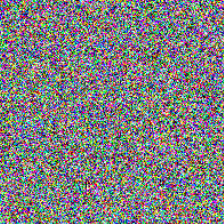

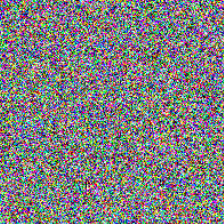

extrema(imorg)=(-0.485f0, 0.594f0)

iter = 1


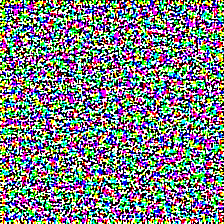


checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15
1 extrema (-11.615058895587921, 12.5779732234478)


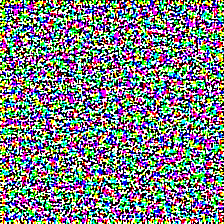


iter = 2

checking ilayer 

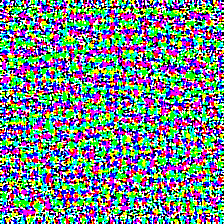

1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 3


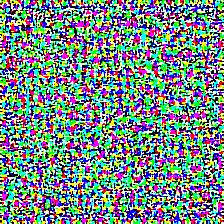


checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 4

checking ilayer 

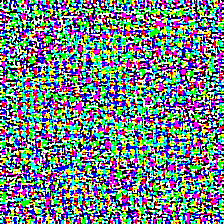

1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 5


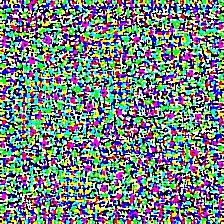


checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 6

checking ilayer 

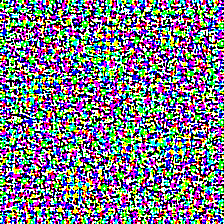

1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 7

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15


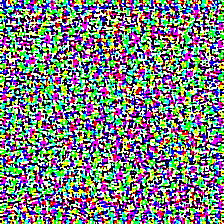

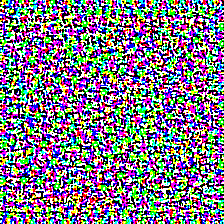


iter = 8

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 9


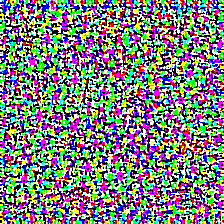


checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 10

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 

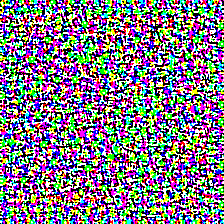

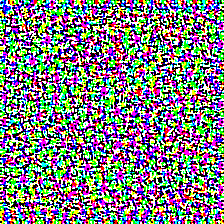

11

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15
11 extrema (-2.0288543979520001e9, 2.600488371712e9)


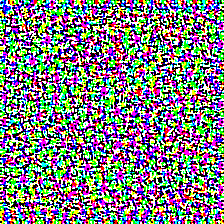

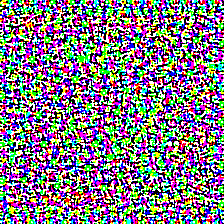


iter = 12

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 13

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 

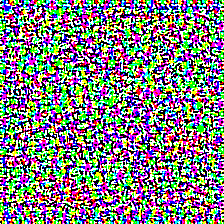

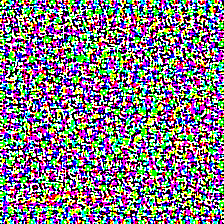

6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 14

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 15


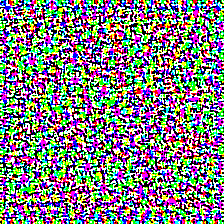


checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 16

checking ilayer 1

checking ilayer 2

checking ilayer 

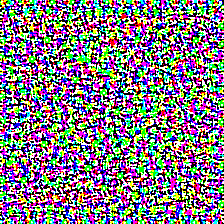

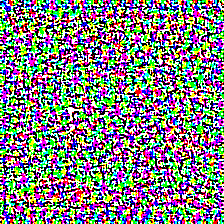

3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 17

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 18

checking ilayer 

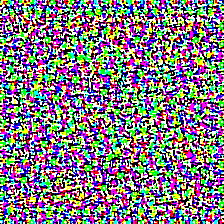

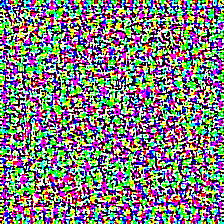

1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 19

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 20

checking ilayer 

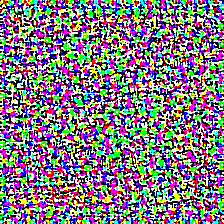

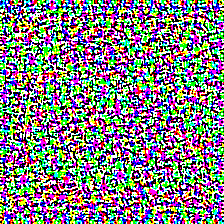

1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 21

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15
21 extrema (-6.153222566569962e17, 8.58744095666537e17)


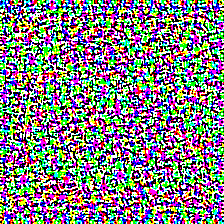

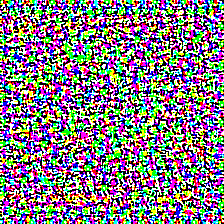


iter = 22

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 23

checking ilayer 1

checking ilayer 

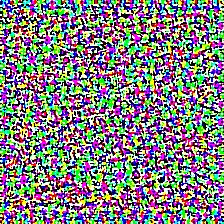

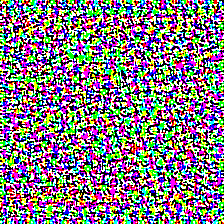

2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 24

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 25


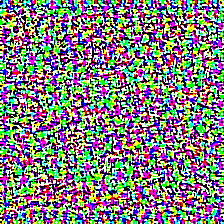

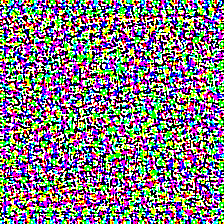


checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 26

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 27


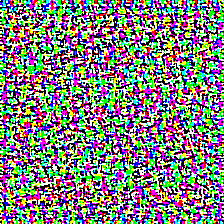

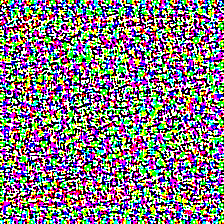


checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 28

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 29


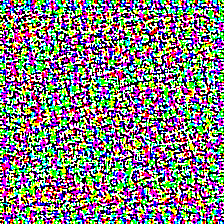

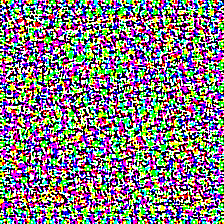


checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 30

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 31


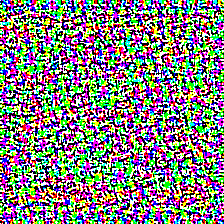

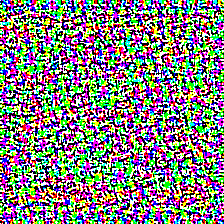


checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15
31 extrema (-1.9747576884961697e26, 2.8719159286149006e26)

iter = 32

checking ilayer 

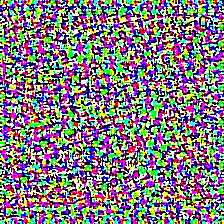

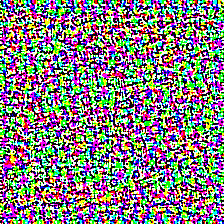

1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 33

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 34

checking ilayer 

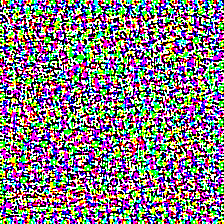

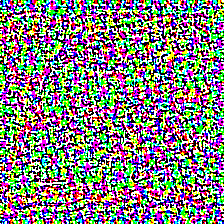

1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 35

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 36

checking ilayer 

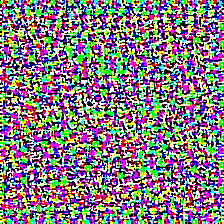

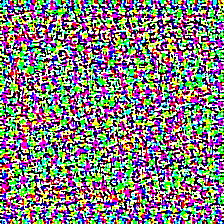

1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 37

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 38

checking ilayer 

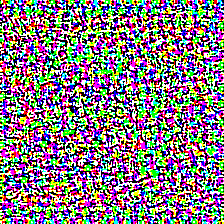

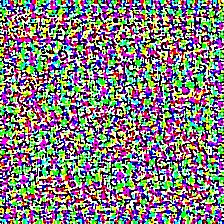

1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 39

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 40

checking ilayer 

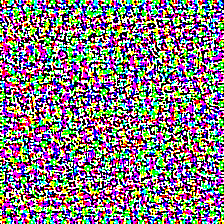

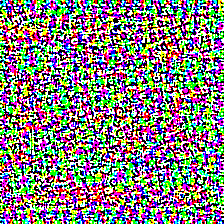

1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 41

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15
41 extrema (-5.989734504931447e34, 9.55116810593856e34)


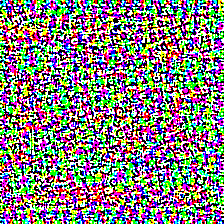

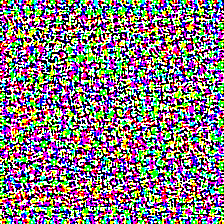


iter = 42

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 43

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 

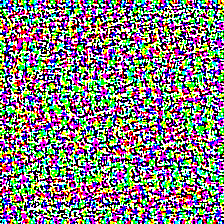

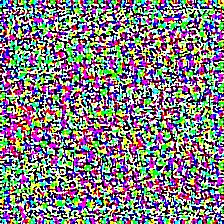

9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 44

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 45


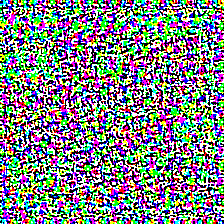

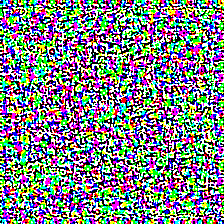


checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 46

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 47


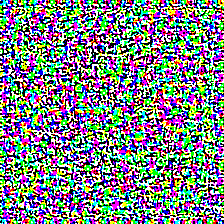

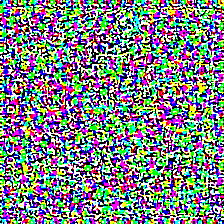


checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 48

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 49


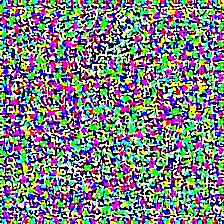

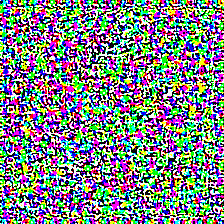


checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 50

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 51


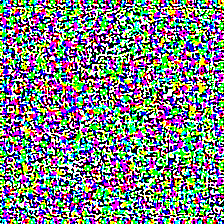

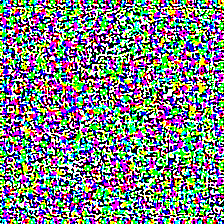


checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15
51 extrema (-Inf, Inf)

iter = 52

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 

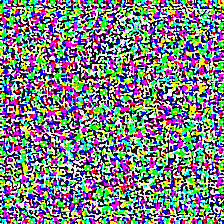

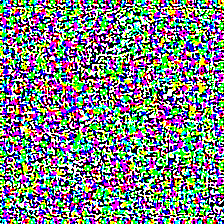

53

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 54

checking ilayer 

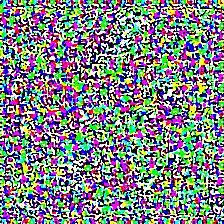

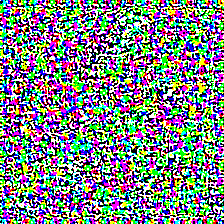

1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 55

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 56

checking ilayer 

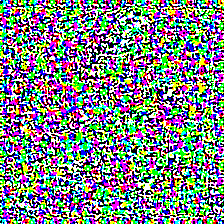

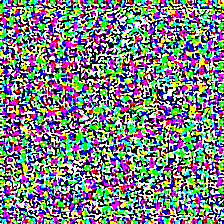

1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 57

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 58

checking ilayer 

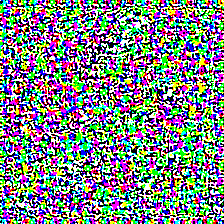

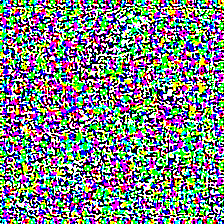

1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 59

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 60

checking ilayer 

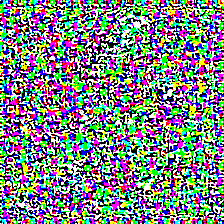

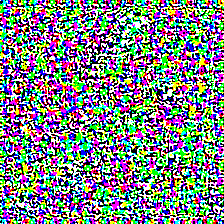

1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 61

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15
61 extrema (-Inf, Inf)


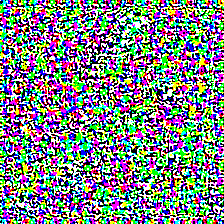

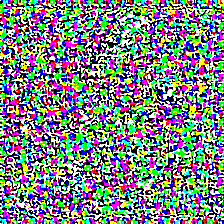


iter = 62

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 63

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 

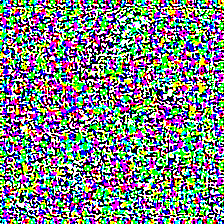

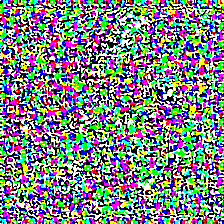

9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 64

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 65


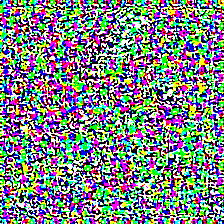

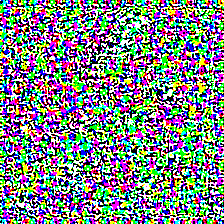


checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 66

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 67


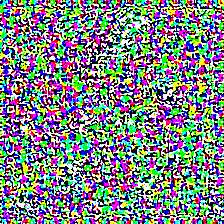

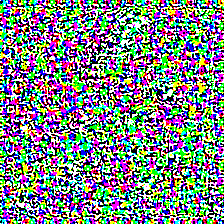


checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 68

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 69


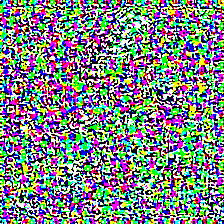

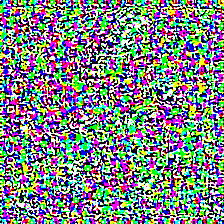


checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 70

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 71


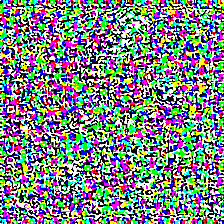

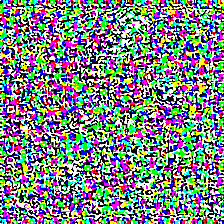


checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15
71 extrema (-Inf, Inf)

iter = 72

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13


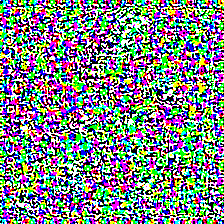

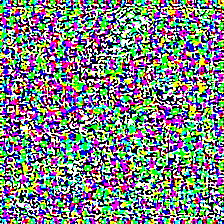


checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 73

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 74

checking ilayer 

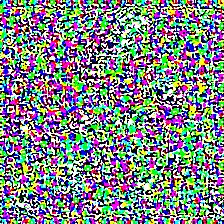

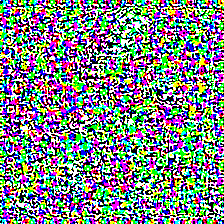

1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 75

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 76

checking ilayer 

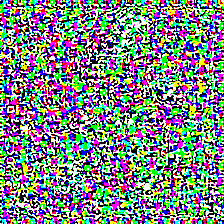

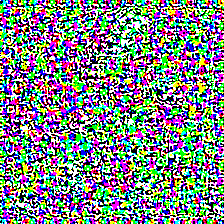

1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 77

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 78

checking ilayer 

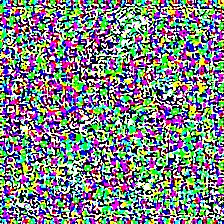

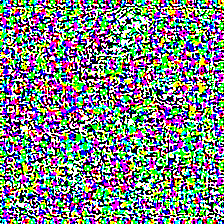

1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 79

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 80

checking ilayer 

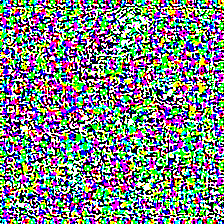

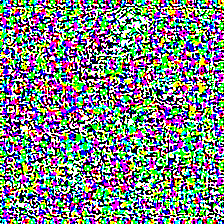

1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 81

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15
81 extrema (-Inf, Inf)


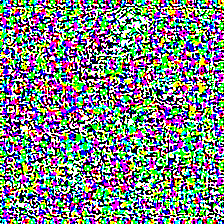

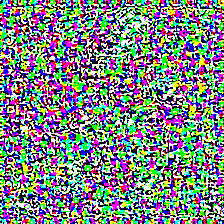


iter = 82

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 83

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15


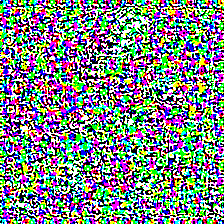

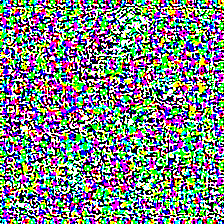


iter = 84

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 85


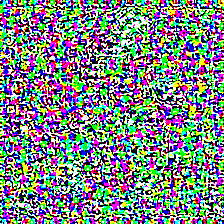

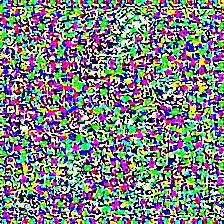


checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 86

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 87


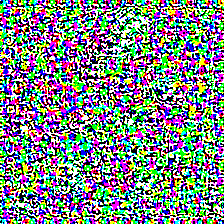

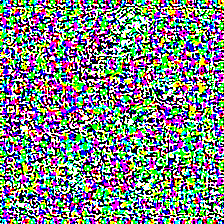


checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 88

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 89


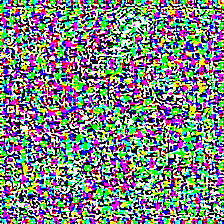

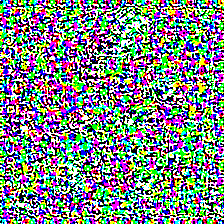


checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 90

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 91


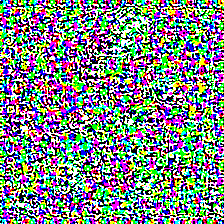

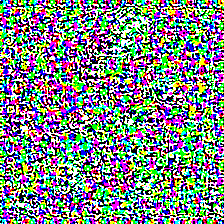


checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15
91 extrema (-Inf, Inf)

iter = 92

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13


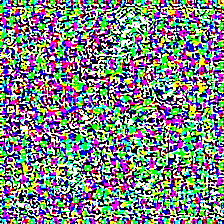

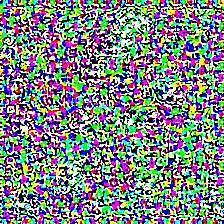


checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 93

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 94

checking ilayer 

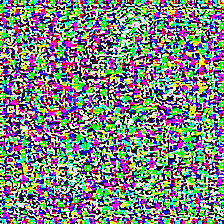

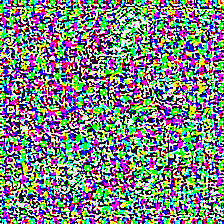

1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 95

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 96

checking ilayer 

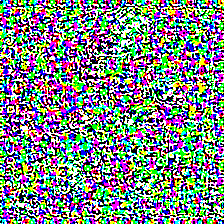

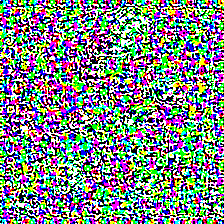

1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 97

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 98

checking ilayer 

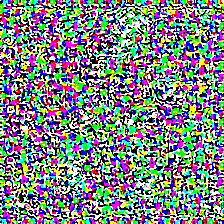

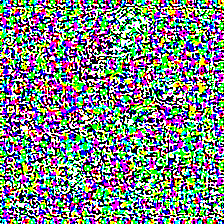

1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 99

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15

iter = 100

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15


In [80]:
W = BSON.load("vgg19.bson")
chain = vgg19_layers(W)
#img = load("cat.jpg")
img = load("_startingimg.png")
imorg = preprocess(img)	# size is (224, 224, 3, 1)
display(toimg(imorg))
#chain = vgg19_layers(W)
println("extrema(imorg)=",extrema(imorg))


imx = copy(imorg) |> gpu
#theloss = mkloss([13])
#daibeval(im) = gradient(aibeval,im,xlayers,p,q,r)[1]
for iter=1:100
    println("\niter = ",iter)
    display(toimg(cpu(imx)))
    global imx
    imx = gpu(imx)  # without this, it stalls on the seocnd iteration
    #thegrad = gradient(aibeval,im,[13])[1]      # thegrad = nothing
    thegrad = gradient(imx->aibeval(imx,[13],chain,PytorchReluLayers,FluxReluLayers,false),imx)[1]
    #print("thegrad = ",thegrad)
    #println("thegrad shape = ",size(thegrad))
    
    # todo check whether on GPU before/after this!
    imx = imx .- 0.001 .* thegrad

    # TODO blur, clamp
    
    if (iter-1)%10==0
      println(iter, " extrema ", extrema(cpu(imx)))
      display(toimg(cpu(imx)))
      #display(toimg(thegrad))
    end
end


# DEBUGGING

In [32]:

function aibevalDBG(im,ptlayers, chain,PytorchReluLayers,FluxReluLayers,verbose=false) # pass in chain also?
  @assert length(FluxReluLayers)==15 && length(FluxReluLayers) == length(PytorchReluLayers)
  sumloss = F(0.)
  scale = F(1.)
    f1size = 802816.
  activ = im
  for ilayer=1:15
    println("\nchecking ilayer ",ilayer)
    layer = chain.layers[ilayer]
    activ = layer(activ)
    ptlayer = LayerLookup[ilayer]

    if verbose let
        _iilayer = findindex(ilayer,FluxReluLayers)
        if _iilayer != -1
          _ptlayer = PytorchReluLayers[_iilayer]
          println("ilayer -> iilayer -> ptlayer ",ilayer," ",_iilayer," ",_ptlayer)
        else
          _ptlayer = -1
        end
        @assert ptlayer == _ptlayer
      end
      println("ptlayer ",ptlayer," of interest? ", ptlayer in ptlayers)
    end

    if ptlayer in ptlayers
        println("adding loss at layer ",ptlayer)
        println("f1.shape=",size(activ))
        sumloss -= scale * sum(activ .* activ)
        println("f1 norm2 ",norm(activ)/f1size,", f1 min,max = ",extrema(activ))
    end
  end
  println("energy1 = ", sumloss / f1size)
  sumloss
end #DEBUG


aibevalDBG (generic function with 2 methods)

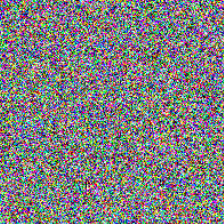

DEBUGGING...
extrema(imorg)=(-0.485f0, 0.594f0)
norm(imorg)=95.2105

iter = 1

checking ilayer 1

checking ilayer 2

checking ilayer 3

checking ilayer 4

checking ilayer 5

checking ilayer 6

checking ilayer 7

checking ilayer 8
adding loss at layer 13
f1.shape=(56, 56, 256, 1)
f1 norm2 0.006165105859277985, f1 min,max = (0.0f0, 83.75636f0)

checking ilayer 9

checking ilayer 10

checking ilayer 11

checking ilayer 12

checking ilayer 13

checking ilayer 14

checking ilayer 15
energy1 = -30.513856226084183


InterruptException: InterruptException:

In [33]:
# debugging cell
using LinearAlgebra

W = BSON.load("vgg19.bson")
chain = vgg19_layers(W)
#img = load("cat.jpg")
img = load("_startingimg.png")
imorg = preprocess(img)	# size is (224, 224, 3, 1)
display(toimg(imorg))
#chain = vgg19_layers(W)
println("DEBUGGING...")
println("size(imorg)=",size(imorg))
println("extrema(imorg)=",extrema(imorg))
println("norm(imorg)=",norm(imorg))

let
    imx = copy(imorg)
    #theloss = mkloss([13])
    #daibeval(im) = gradient(aibeval,im,xlayers,p,q,r)[1]
    imx = gpu(imx)
    for iter=1:100
        println("\niter = ",iter)
        #global imx

        #thegrad = gradient(aibeval,im,[13])[1]      # thegrad = nothing
        thegrad = gradient(imx->aibevalDBG(imx,[13],chain,PytorchReluLayers,FluxReluLayers),imx)[1]
        #print("thegrad = ",thegrad)
        println("thegrad shape = ",size(thegrad))
        imx = imx .- 0.001 .* thegrad
        
        if (iter-1)%1==0
            println(iter, " imx extrema ", extrema(imx));
            display(toimg(imx))
            if iter>1  display(toimg(thegrad))   end
        end

        # TODO blur, clamp

    end
end # debugging